### AG-002

<img src='images/penguin.png' width= 500px>

#### Nome da Dupla  e Mátricula

Nome: Lucas Cinquetti Moreira; Carl Betsa Costa

Matrícula: 330; 59

#### Bibliotecas

In [13]:
### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

### Avaliação de métricas
from sklearn.metrics import accuracy_score

data = pd.read_csv("palmerpenguins.csv")
data.head() # imprimir 5 primeiros registros

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


#### Convertendo valores do Dataset para números inteiros

In [14]:
# Mapeamento para as colunas
island_mapping = {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}
sex_mapping = {'FEMALE': 0, 'MALE': 1}
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

# Aplicando os mapeamentos
data['island'] = data['island'].replace(island_mapping)
data['sex'] = data['sex'].replace(sex_mapping)
data['species'] = data['species'].replace(species_mapping)

data.head()

C:\Users\cinqu\AppData\Local\Temp\ipykernel_85912\3785448835.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['island'] = data['island'].replace(island_mapping)
C:\Users\cinqu\AppData\Local\Temp\ipykernel_85912\3785448835.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace(sex_mapping)
C:\Users\cinqu\AppData\Local\Temp\ipykernel_85912\3785448835.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicit

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181,3750,1
1,0,2,39.5,17.4,186,3800,0
2,0,2,40.3,18.0,195,3250,0
3,0,2,36.7,19.3,193,3450,0
4,0,2,39.3,20.6,190,3650,1


#### Reordenando Colunas

In [15]:
nova_ordem_colunas = ['island', 'sex', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']

data2 = data.reindex(columns= nova_ordem_colunas)

data2.head()

,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,2,1,39.1,18.7,181,3750,0
1,2,0,39.5,17.4,186,3800,0
2,2,0,40.3,18.0,195,3250,0
3,2,0,36.7,19.3,193,3450,0
4,2,1,39.3,20.6,190,3650,0


#### Separando o alvo dos dados e chamando train_test_split

In [16]:
# Separando dados
## Variáveis preditoras
X = data.loc[:,['island', 'sex', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
X = np.array(X)

## Variável alvo
y = data["species"]
y = np.array(y)

## Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(f"Tamanho X de treino: {X_train.shape}")
print(f"Tamanho X de teste: {X_test.shape}")
print(f"Tamanho y de treino: {y_train.shape}")
print(f"Tamanho y de teste: {y_test.shape}")


Tamanho X de treino: (266, 6)
Tamanho X de teste: (67, 6)
Tamanho y de treino: (266,)
Tamanho y de teste: (67,)


#### Instanciando, treinando e prevendo com os modelos Knn e Decision Tree

In [17]:
# instanciando modelos
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()


# Treinando modelos
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Prevendo valores
tree_predict = tree.predict(X_test)
knn_predict = knn.predict(X_test)

# Avaliação
tree_score = accuracy_score(y_test, tree_predict)
knn_score = accuracy_score(y_test, knn_predict)

print(f"Pontuação Decision Tree:{tree_score}")
print(f"Pontuação KNN:{knn_score}")

Pontuação Decision Tree:0.9850746268656716
Pontuação KNN:0.7910447761194029


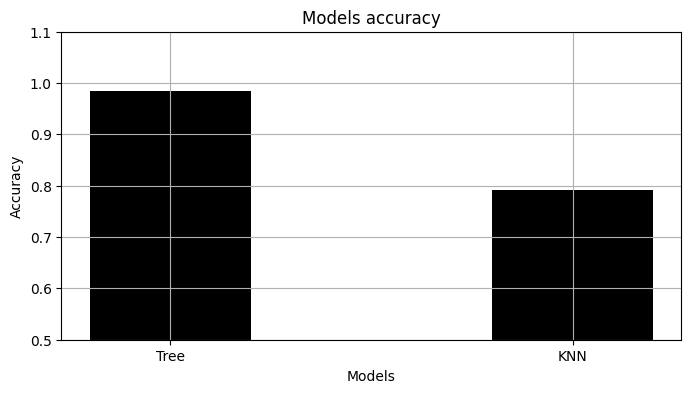

In [18]:
# Plotando resultados
plt.figure(figsize = (8,4))
plt.title("Models accuracy")
plt.bar(x = [0,2], height = [tree_score, knn_score], color = "black")
plt.xticks([0,2], ["Tree", "KNN"])
plt.ylim(0.5,1.1)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.grid()
plt.show()

#### Input de teste (Pedir pro usuário as informações de um penguin para que ele seja classificado)

In [ ]:
# Função para permitir ao usuário inserir dados
def classify_penguin():
    print("Insira os dados do pinguim para classificação:")
    island = int(input("Ilha (0: Biscoe, 1: Dream, 2: Torgersen): "))
    sex = int(input("Sexo (0: FEMALE, 1: MALE): "))
    culmen_length_mm = float(input("Comprimento do culmen (mm): "))
    culmen_depth_mm = float(input("Profundidade do culmen (mm): "))
    flipper_length_mm = float(input("Comprimento da nadadeira (mm): "))
    body_mass_g = float(input("Massa corporal (g): "))

    # Criar um DataFrame com os dados inseridos
    input_data = pd.DataFrame({
        'island': [island],
        'sex': [sex],
        'culmen_length_mm': [culmen_length_mm],
        'culmen_depth_mm': [culmen_depth_mm],
        'flipper_length_mm': [flipper_length_mm],
        'body_mass_g': [body_mass_g]
    })

    # Fazer previsões com os modelos treinados
    tree_prediction = tree.predict(input_data)[0]
    knn_prediction = knn.predict(input_data)[0]

    # Mapeamento inverso para a espécie
    species_reverse_mapping = {0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}
    
    print(f"Previsão Decision Tree: {species_reverse_mapping[tree_prediction]}")
    print(f"Previsão KNN: {species_reverse_mapping[knn_prediction]}")

# Chamar a função para inserir dados e classificar o pinguim
classify_penguin()